# Dimensional Reduction and Regression of Transitional Spin Precession (TSP) Events

In [2]:
# importing tools
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
# import pycbc
# from pycbc.detector import Detector, get_available_detectors
# from pycbc import waveform as waveform
# import pylab
# import pycbc.psd
# from pycbc.filter import match, matched_filter, sigmasq, overlap_cplx
# from pycbc.detector import Detector
# from pycbc.waveform import get_td_waveform
# from scipy.interpolate import interp1d
# from pycbc.cosmology import _redshift

In [3]:
#doing this to suppress excessive deprecation warnings in SVM section
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Reading in the Data

In [4]:
#reading in dataset:
npy_directory = "/home/nowickr/pnevo/PNevo/astr8070/MPARs_for_Project/npy_outputs/" #filepath for my local machine; change as needed
data = np.load(f"{npy_directory}TSP_dataset.npy") #loading data

In [5]:
#loading in data columns
q = data[:,0]       #mass ratio m1/m2>=1
Smag = data[:,1]    #primary spin magnitude, in normalized spin units
beta = data[:,2]    #initial polar angle of spin magnitude, in degrees 
sep = data[:,3]     #separation at which TSP occurs, in units of M_total (ex. 11 ==> 11M); will lie between 150M and 11M

In [47]:
#nan-dropped dataset
data_tsp = data[~np.isnan(data).any(axis=1)]

In [7]:
#loading in data columns
q_tsp = data_tsp[:,0]       #mass ratio m1/m2>=1
Smag_tsp = data_tsp[:,1]    #primary spin magnitude, in normalized spin units
beta_tsp = data_tsp[:,2]    #initial polar angle of spin magnitude, in degrees 
sep_tsp = data_tsp[:,3]     #separation at which TSP occurs, in units of M_total (ex. 11 ==> 11M); will lie between 150M and 11M

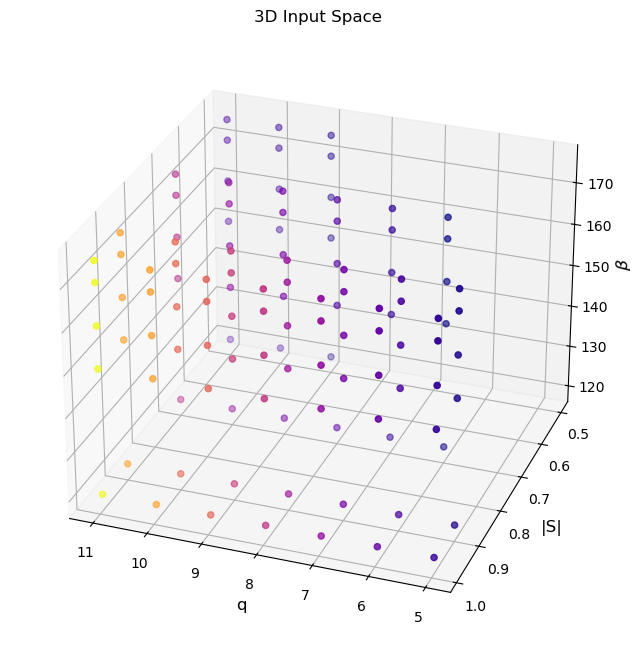

In [45]:
#PLOTTING 3D PLUS COLORBAR
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

#plotting data
ax.scatter(q_tsp, Smag_tsp, beta_tsp, 
        c=sep_tsp, cmap='plasma',
        # zorder=15, linestyle='none', 
        # marker='o', alpha=0.5
        )
#plotting predicted fit
# ax.scatter(X1grid.flatten(), X2grid.flatten(), y_pred_grid, 
#            facecolor=(0,0,0,0), s=20, 
#            edgecolor='#70b3f0')
ax.set_xlabel('q', fontsize=12)
ax.set_ylabel('|S|', fontsize=12)
ax.set_zlabel('$\\beta$', fontsize=12)

ax.set_title('3D Input Space')
ax.view_init(elev=28, azim=110)

#------------------------------------------

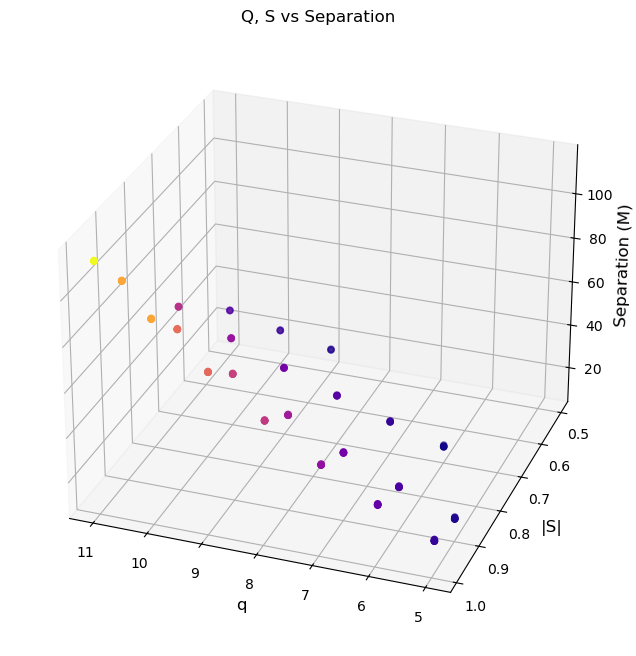

In [46]:
#PLOTTING 2D+Sep PLUS COLORBAR
#%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

#plotting data
ax.scatter(q_tsp, Smag_tsp, sep_tsp, 
        c=sep_tsp, cmap='plasma',
        # zorder=15, linestyle='none', 
        # marker='o', alpha=0.5
        )
#plotting predicted fit
# ax.scatter(X1grid.flatten(), X2grid.flatten(), y_pred_grid, 
#            facecolor=(0,0,0,0), s=20, 
#            edgecolor='#70b3f0')
ax.set_xlabel('q', fontsize=12)
ax.set_ylabel('|S|', fontsize=12)
ax.set_zlabel('Separation (M)', fontsize=12)

ax.set_title('Q, S vs Separation')
ax.view_init(elev=28, azim=110)

#------------------------------------------

What I noticed from this plot was that there were seemingly fewer points! What this told me was that $\beta$ had no effect on the separation at which TSP occurred, as all points of shared q,S yielded the same separation. Looking back at the 3D input plot, we can see this reflected as all points in the same columns having the same color (read: separation at TSP).

## Using Clustering to Identify Parameter Spaces Where TSP Does/Does Not Occur

Given that the simulations either have a separation value where TSP occurred or have a '''nan''' value indicating TSP did not occur in the simulated window, we can use these to represent two features which can be used to train a classifier.

<i> Note! Limited sample size limits the usefulness of this classification scheme, so please bear with as the classifier does its best </i>

In [9]:
#getting indicies of tsp and non-tsp events
tsp_index = np.where(data[:,3]>0)
nan_index = np.where(np.isnan(data[:,3]))

#creating target label array (1 for tsp, 0 for nan)
tsp_label = np.zeros(240)
tsp_label[tsp_index] = 1
print(tsp_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
#creating array of columns that are NOT separation
data_nsep = data[:,:3]

In [11]:
#importing tool
from sklearn.model_selection import train_test_split

#performing train-test-split
data_nsep_train, data_nsep_test, tsp_train, tsp_test = train_test_split(data_nsep, tsp_label, test_size=0.2)

In [12]:
#importing KNN
from sklearn.neighbors import KNeighborsClassifier
#importing SVM
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#importing roc curve
from sklearn.metrics import roc_curve

#### K-Nearest Neighbors

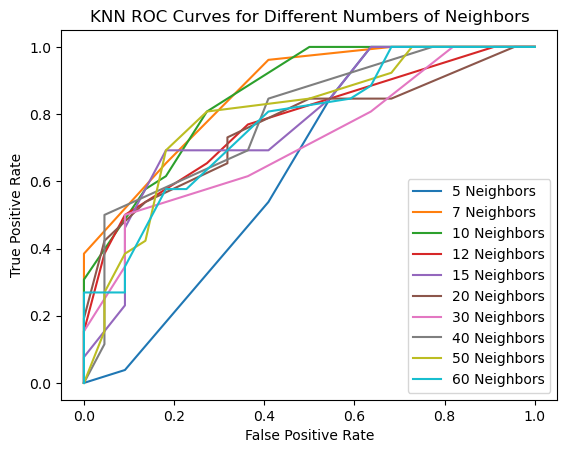

In [13]:
N = [5,7,10,12,15,20,30,40,50,60] #max number of neighbors; highest is 60 which is 1/4 of all data points
integ_k = [] #array to hold integral values
#creating component for loop
for n in N: #ten times
    #getting iteratively more features out of test and train data
    features = data_nsep_train
    test = data_nsep_test
    #fitting model
    knn = KNeighborsClassifier(n_neighbors=(n))
    knn.fit(features, tsp_train)
    #making predictions
    prob_pred = knn.predict_proba(test)
    tsp_prob = knn.classes_   

    # Second axis shows the ROC curves (code from Lecture 20)
    fpr_k, tpr_k, thresholds_k = roc_curve(tsp_test, prob_pred[:,1]) #false positive right, true positive right, thresholds

    fpr_k = np.concatenate([[0], fpr_k])
    tpr_k = np.concatenate([[0], tpr_k])

    plt.plot(fpr_k, tpr_k, label='%i Neighbors' %n )# label=labels[name])

    #integral area under curve
    integral_k = np.trapz(x=fpr_k,y=tpr_k)
    integ_k.append(integral_k)

plt.title('KNN ROC Curves for Different Numbers of Neighbors')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.xlim(0,0.01)
plt.show()

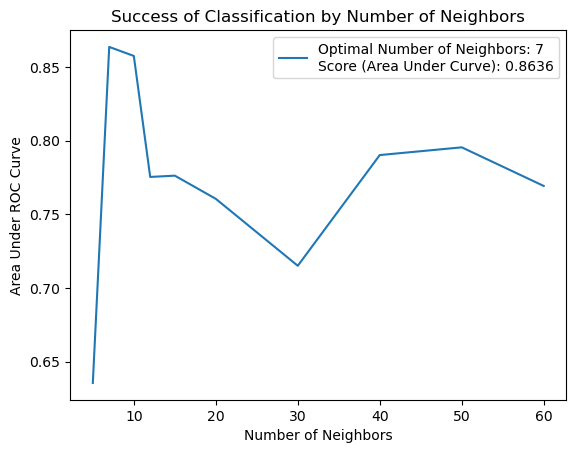

In [14]:
plt.plot(N,integ_k)
plt.title('Success of Classification by Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Area Under ROC Curve')
#plt.xlim(1,10)
neighbors_opt = N[integ_k.index(max(integ_k))]
plt.legend(['Optimal Number of Neighbors: %i' %neighbors_opt + '\nScore (Area Under Curve): %.4f' %max(integ_k)])

#### Making Predictions with KNN

In [16]:
#meshgrid of q and S parameter space
q_grid = np.linspace(4,11,100)
S_grid = np.linspace(0,1,100)

QS1grid, QS2grid = np.meshgrid(q_grid,S_grid)
QSmeshgrid = np.vstack((QS1grid.flatten(),QS2grid.flatten())).T

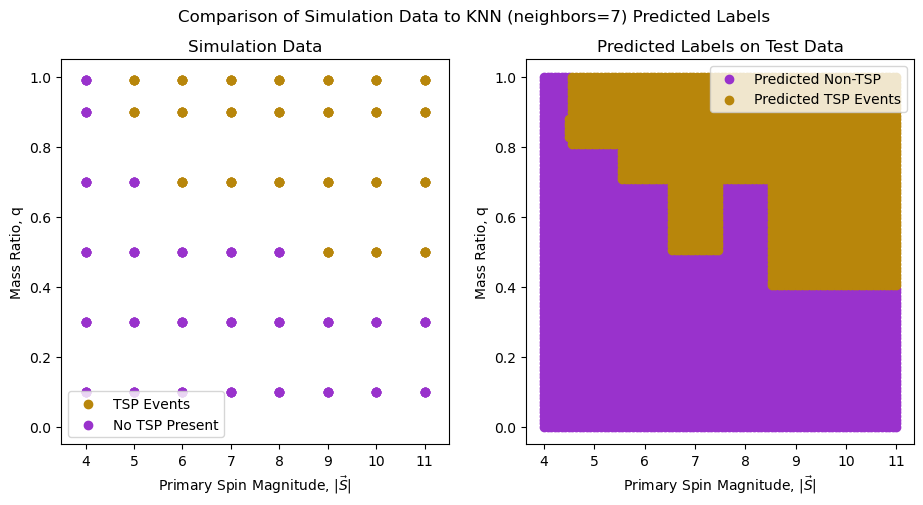

In [17]:
fig = plt.figure(figsize=(11,5))
fig.suptitle('Comparison of Simulation Data to KNN (neighbors=7) Predicted Labels')

#left plot, original data
ax1 = fig.add_subplot(121)
ax1.scatter(data[tsp_index,0], data[tsp_index,1], color='darkgoldenrod', label='TSP Events') 
ax1.scatter(data[nan_index,0], data[nan_index,1], color='darkorchid', label='No TSP Present')
ax1.set_ylabel('Mass Ratio, q')
ax1.set_xlabel('Primary Spin Magnitude, $|\\vec{S}|$')
ax1.set_xlim(3.5,11.5)
ax1.set_ylim(-0.05,1.05)
ax1.set_title('Simulation Data')
ax1.legend()

#right plot, color-coded by predicted class from best-performing classifier
knmodel = KNeighborsClassifier(n_neighbors=(neighbors_opt))
knmodel.fit(data_nsep_train[:,:2], tsp_train)
#making predictions
prob_pred_kn = knmodel.predict_proba(QSmeshgrid) 
#print(prob_pred_kn) #first column is probability of class 0, second is probability of class 1
nan_index_kn = np.where(prob_pred_kn[:,1]<=prob_pred_kn[:,0])
tsp_index_kn = np.where(prob_pred_kn[:,1]>prob_pred_kn[:,0])
#plotting now
ax2 = fig.add_subplot(122)
ax2.scatter(QS1grid.flatten()[nan_index_kn], QS2grid.flatten()[nan_index_kn], color='darkorchid', label='Predicted Non-TSP') #plotting non-tsp
ax2.scatter(QS1grid.flatten()[tsp_index_kn], QS2grid.flatten()[tsp_index_kn], color='darkgoldenrod', label='Predicted TSP Events') #plotting tsp
ax2.set_ylabel('Mass Ratio, q')
ax2.set_xlabel('Primary Spin Magnitude, $|\\vec{S}|$')
ax2.set_title('Predicted Labels on Test Data')
ax2.legend()

### Support Vector Machines Classifier

In [18]:
#this is the function from the SVM unit in Lecture 20
def plot_svc_decision_function(clf, color='k', ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    u = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    v = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    yy, xx = np.meshgrid(v, u)

    P = np.zeros_like(xx)
    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            Xgrid = np.array([ui, vj])
            P[i, j] = clf.decision_function(Xgrid.reshape(1,-1))
    return ax.contour(xx, yy, P, colors=color,
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'], 
                    )

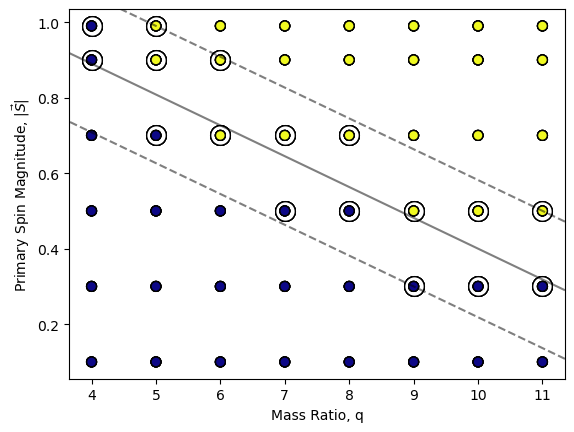

In [19]:
#more regularization
svm = SVC(kernel='linear', C=0.9)
svm.fit(data_nsep[:,:2],tsp_label)

#plotting points
plt.xlabel('Mass Ratio, q')
plt.ylabel('Primary Spin Magnitude, $|\\vec{S}|$')
plt.scatter(svm.support_vectors_[:, 0], 
            svm.support_vectors_[:, 1], 
            s=200, edgecolor='k', facecolor='w');
plt.scatter(data_nsep[:, 0], data_nsep[:, 1], c=tsp_label, s=50, 
            cmap='plasma', edgecolor='k')
plot_svc_decision_function(svm)

# plt.contour(QS1grid.flatten(),QS2grid.flatten(),boundary)


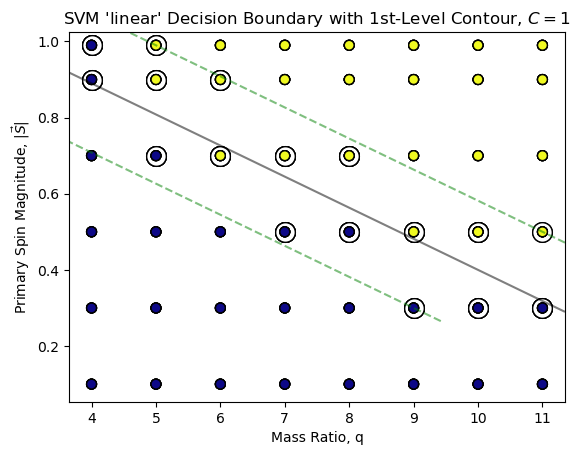

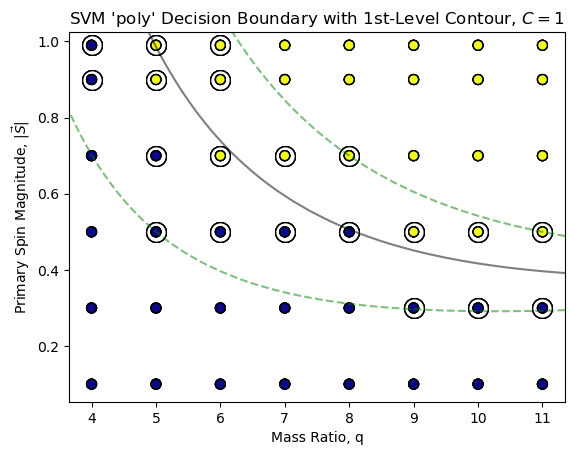

In [40]:
#Defining general SVC Parameters
C = [1]                         #regularization constant
kernel = ['linear','poly']      #fitting kernels, linear and polynomial
color = ['g','k','g']           #colors of boundary

#getting iteratively more features out of test and train data
features = data_nsep_train
test = data_nsep_test

#creating component for loop
for kern in kernel:
        for c in C: #for future efforts to look at multiple C values
                #fitting model
                svm = SVC(kernel=kern, C=c)
                svm.fit(data_nsep[:,:2],tsp_label)
                #plotting points
                plt.scatter(svm.support_vectors_[:, 0], 
                        svm.support_vectors_[:, 1], 
                        s=200, edgecolor='k', facecolor='w');
                #plotting deicision boundary
                plot_svc_decision_function(svm, color=color)
        #plotting one time plots
        plt.xlabel('Mass Ratio, q')
        plt.ylabel('Primary Spin Magnitude, $|\\vec{S}|$')
        plt.scatter(data_nsep[:, 0], data_nsep[:, 1], c=tsp_label, s=50, 
                        cmap='plasma', edgecolor='k')
        plt.title('SVM \'%s\' Decision Boundary with 1st-Level Contour, $C=1$' %kern)
        plt.show()

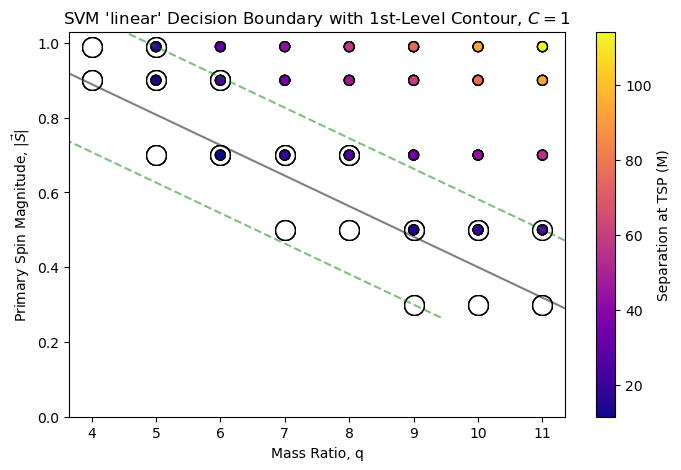

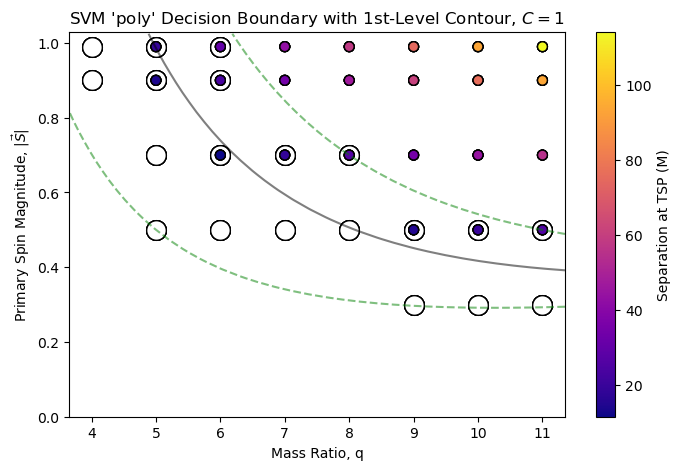

In [41]:
#finding decision boundaries; now color-code by sep@TSP
for i in range(len(sep)):
    sep_zero_ind = np.where(not(sep[i]>0))
    sep_zero = sep
    sep_zero[sep_zero_ind] = 0

#creating component for loop
for kern in kernel:
        plt.figure(figsize=(8,5))
        for c in C: #ten times
                #fitting model
                svm = SVC(kernel=kern, C=c)
                svm.fit(data_nsep[:,:2],tsp_label)
                #plotting points
                plt.scatter(svm.support_vectors_[:, 0], 
                        svm.support_vectors_[:, 1], 
                        s=200, edgecolor='k', facecolor='w');
                #plotting deicision boundary
                plot_svc_decision_function(svm, color=color)
        #plotting one time plots
        plt.xlabel('Mass Ratio, q')
        plt.ylabel('Primary Spin Magnitude, $|\\vec{S}|$')
        plt.ylim(0,1.03)

        plt.scatter(data_nsep[1:, 0], data_nsep[1:, 1], c=sep_zero[1:], s=50, 
                        cmap='plasma', edgecolor='k')
        plt.colorbar(label='Separation at TSP (M)')
        plt.title('SVM \'%s\' Decision Boundary with 1st-Level Contour, $C=1$' %kern)
        #plt.legend(['','TSP', 'No TSP'])
        #plt.xlim(0,0.01)
        plt.show()

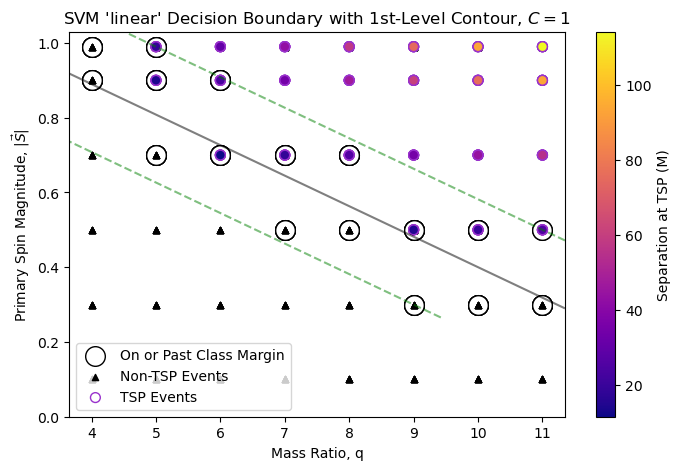

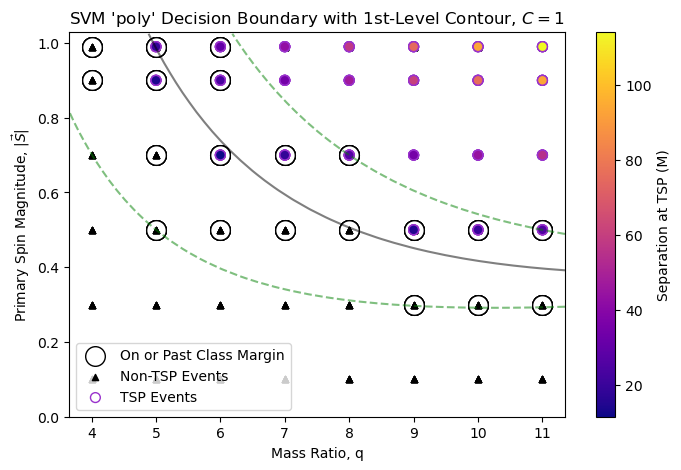

In [42]:
#ADDING IN THE NAN-TSP DATAPOINTS AS BLACK SQUARES

#creating component for loop
for kern in kernel:
        plt.figure(figsize=(8,5))
        for c in C: #ten times
                #fitting model
                svm = SVC(kernel=kern, C=c)
                svm.fit(data_nsep[:,:2],tsp_label)
                #plotting points
                plt.scatter(svm.support_vectors_[:, 0], 
                        svm.support_vectors_[:, 1], 
                        s=200, edgecolor='k', facecolor='w');
                #plotting deicision boundary
                plot_svc_decision_function(svm, color=color)
        #plotting one time plots
        plt.xlabel('Mass Ratio, q')
        plt.ylabel('Primary Spin Magnitude, $|\\vec{S}|$')
        plt.ylim(0,1.03)
        #plotting nan tsp events
        plt.scatter(data_nsep[1:, 0], data_nsep[1:, 1], color='k', s=20, marker='^', 
                        #cmap='plasma', edgecolor='darkorchid'
                        )
        #plotting points on or past margins, identified with large black circles
        plt.scatter(data_nsep[1:, 0], data_nsep[1:, 1], c=sep_zero[1:], s=50, 
                        cmap='plasma', edgecolor='darkorchid')
        plt.colorbar(label='Separation at TSP (M)')
        plt.title('SVM \'%s\' Decision Boundary with 1st-Level Contour, $C=1$' %kern)
        plt.legend(['On or Past Class Margin','Non-TSP Events','TSP Events'])
        #plt.xlim(0,0.01)
        plt.show()

#### SVM in 3D

In [37]:
#REDEFINED FOR 3D PLOTTING; this is based on the function from the SVM unit in Lecture 20
def plot_svc_decision_function_3d(clf, color='k', ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    u = np.linspace(plt.xlim()[0], plt.xlim()[1], 20)
    v = np.linspace(plt.ylim()[0], plt.ylim()[1], 20)
    w = np.linspace(90, 180, 20)
    zz, yy, xx = np.meshgrid(w, v, u)
    print(zz.shape)

    # P = np.zeros_like(xx)
    # for i, ui in enumerate(u):
    #     for j, vj in enumerate(v):
    #         for l, wl in enumerate(w):
    #             Xgrid = np.array([ui, vj, wl])
    #             P[i, j, l] = clf.decision_function(Xgrid.reshape(1,-1))
    z = lambda x,y: (-svm.intercept_[0]-svm.coef_[0][0]*xx-svm.coef_[0][1]*yy) / (svm.coef_[0][2])
    return ax.scatter(xx,yy, z(xx,yy)#z, 
                      #P, 
                      #colors=color,
                      #levels=[-1, 0, 1], alpha=0.5,
                      #linestyles=['--', '-', '--'], 
                    )

(20, 20, 20)


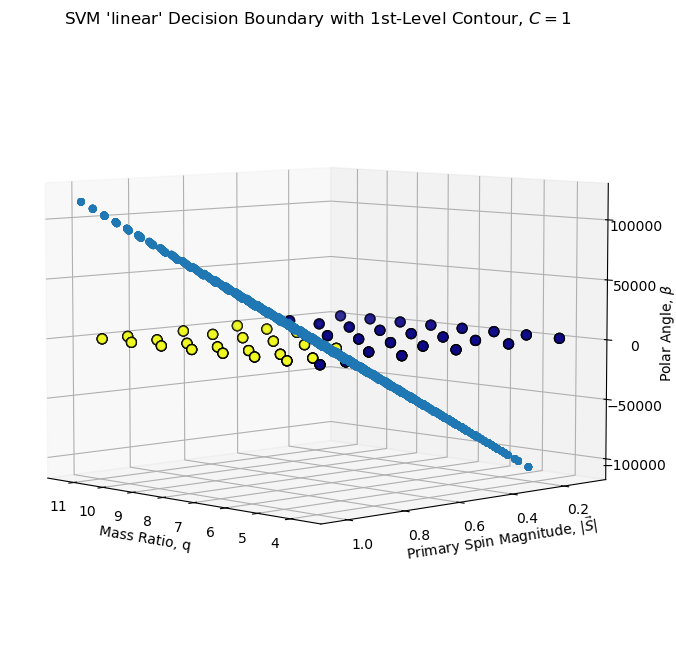

In [38]:
C = [1] 
kernel = ['linear']#,'poly']
color = ['g','k','g']
width_svm = [] #array to hold integral values

#getting iteratively more features out of test and train data
features = data_nsep_train
test = data_nsep_test

#%matplotlib widget
#creating component for loop
for kern in kernel:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        for c in C: #ten times
                #fitting model
                svm = SVC(kernel=kern, C=c)
                svm.fit(data_nsep,tsp_label)
                #plotting points
                ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], svm.support_vectors_[:, 2], edgecolor='k', facecolor='w');
                #plotting deicision boundary
                plot_svc_decision_function_3d(svm, color=color)
        #plotting one time plots
        ax.set_xlabel('Mass Ratio, q')
        ax.set_ylabel('Primary Spin Magnitude, $|\\vec{S}|$')
        ax.set_zlabel('Polar Angle, $\\beta$')
        #ax.set_zlim(0,1080)
        ax.scatter(data_nsep[:, 0], data_nsep[:, 1], data_nsep[:, 2], c=tsp_label, s=50, 
                        cmap='plasma', edgecolor='k')
        ax.view_init(elev=6, azim=136)
        plt.title('SVM \'%s\' Decision Boundary with 1st-Level Contour, $C=1$' %kern)
        #plt.legend(['','TSP', 'No TSP'])
        #plt.xlim(0,0.01)
        plt.show()